# Predicting Heart Disease Using Machine Learning

SC1015 Lab Group FCSI - Group 1
- Aloysius Lee (U2322402L)
- Faybeata (U2323102A)
- Nicholas Chang (U2322962F)

> Important: Please use extended markdown syntax to view this project!

# 1. Data Preparation and Cleaning

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read csv file
df = pd.read_csv("heart.csv")

# Check for missing values and printing them out
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with duplicates
df.drop_duplicates()

# Drop rows with NULL values
df = df.dropna()

# Renaming variable for easier understanding
df = df.rename(columns={'cp': 'chest_pain_type'})
df = df.rename(columns={'trestbps': 'resting_blood_pressure'})
df = df.rename(columns={'chol': 'cholesterol'})
df = df.rename(columns={'fbs': 'fasting_blood_sugar'})
df = df.rename(columns={'restecg': 'resting_electrocardiographic_results'})
df = df.rename(columns={'thalach': 'max_heart_rate'})
df = df.rename(columns={'exang': 'exercise_induced_angina'})
df = df.rename(columns={'oldpeak': 'ST_depression_induced_by_exercise_relative_to_rest'})
df = df.rename(columns={'ca': 'number_of_major_vessels_(0-3)_colored_by_flouroscopy'})
df = df.rename(columns={'thal': 'thalassemia'})

df.info()
# Check the datatype
df.head(500)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   age                                                   1025 non-null   int64  
 1   sex                                                   1025 non-null   int64  
 2   chest_pain_type                                       1025 non-null   int64  
 3   resting_blood_pressure                                1025 non-null   int64  
 4   cholesterol                                           1025 non-null   int64  
 5   fasting_blood_sugar                                   1025 non-null   int64  
 6   resting_electro

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope,number_of_major_vessels_(0-3)_colored_by_flouroscopy,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
496,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
497,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
498,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


#### Cleaning "Number of Major Vessels Colored by Flouroscopy"

During data preparation, we have realised that in the column "number of major vessels colored by flouroscopy" there is an invalid value of 4 that appears in some rows of data. Here, we have extracted and removed the rows with these invalid values.

In [41]:
# Check if any categortical variable have values that are not within the varibable

# The column "number_of_major_vessels_(0-3)_colored_by_flouroscopy" is suppoed to only have values 0, 1, 2, 3

# Check if 4 is present in the column
count_of_4 = df['number_of_major_vessels_(0-3)_colored_by_flouroscopy'].eq(4).sum()

print("Number of times 4 was the value:", count_of_4)

# The value 4 appeared which is incorrect, so we must remove the rows with value of 4
valid_values = [0, 1, 2, 3]
df = df[df['number_of_major_vessels_(0-3)_colored_by_flouroscopy'].isin(valid_values)]
df.describe()
# At the row "max", the column "number_of_major_vessels_(0-3)_colored_by_flouroscopy" has only max value of 3 so all is good

Number of times 4 was the value: 18


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope,number_of_major_vessels_(0-3)_colored_by_flouroscopy,thalassemia,target
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,54.591857,0.690169,0.933466,131.567031,246.732870,0.148957,0.524330,148.903674,0.339623,1.088779,1.381331,0.696127,2.322741,0.507448
std,9.008239,0.462654,1.031580,17.655113,51.618989,0.356223,0.528656,23.081532,0.473816,1.178132,0.619088,0.943227,0.622722,0.500193
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


#### Cleaning "Thalassemia"

In the code below, we have also removed invalid rows with invalid values in the column "Thalassemia".

In [42]:
# Check if any categortical variable have values that are not within the varibable

# Check if 0 is present in the column
count_of_0 = df['thalassemia'].eq(0).sum()

print("Number of times 0 was the value:", count_of_0)

# The value 0 appeared which is incorrect, so we must remove the rows with value of 0
valid_values = [1, 2, 3]
df = df[df['thalassemia'].isin(valid_values)]
df.describe()
# At the row "min", the column "thalassemia" has only max value of 1 so all is good

Number of times 0 was the value: 7


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope,number_of_major_vessels_(0-3)_colored_by_flouroscopy,thalassemia,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,0.691000,0.934000,131.592000,246.996000,0.146000,0.52400,148.977000,0.338000,1.092400,1.381000,0.701000,2.339000,0.508000
std,9.037822,0.462312,1.031847,17.714326,51.700802,0.353283,0.52887,23.083139,0.473265,1.180727,0.619857,0.944718,0.593659,0.500186
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.00000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.00000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.00000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


#### Changing to Appropriate Data Types

Fortunately, the datatypes have already been processed into numerical values.

The true data types are listed below.

| Variables      | Actual Values | Encoded Values |
| ----------- | ----------- | ----- |
|1. age | Numerical | Numerical (unchanged)|
|2. sex | Categorical - Female / Male | 1: Male, 0: Female|
|3. chest pain type | Categorical - 4 values | Numerical (0-3)|
|4. resting blood pressure | Numerical (in mm Hg on admission to the hospital) | Numerical (unchanged)|
|5. serum cholestoral | Numerical (mg/dl) | Numerical (unchanged)|
|6. fasting blood sugar > 120 mg/dl | True/False | Numerical - Boolean (1/0)|
|7. resting electrocardiographic results | Categorical | 0 = normal; 1 = ST-T wave abnormality; 2 = left ventricular hypertrophy|
|8. maximum heart rate achieved | Numerical | Numerical (unchanged)|
|9. exercise induced angina | True/False | Numerical - Boolean (1/0)|
|10. oldpeak = ST depression induced by exercise relative to rest | Numerical | Numerical (unchanged)
|11. the slope of the peak exercise ST segment | Categorical - upsloping, flat (horizontal) and downsloping | Numerical (0-2)|
|12. number of major vessels (0-3) colored by flouroscopy | Numerical | Numerical (unchanged)|
|13. thalassemia | Categorical - normal, fixed defect, reversable defect | Numerical (0-2)|
|14. **target** | Categorical - have/don't have Heart Disease | Numerical - Boolean|




In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   age                                                   1000 non-null   int64  
 1   sex                                                   1000 non-null   int64  
 2   chest_pain_type                                       1000 non-null   int64  
 3   resting_blood_pressure                                1000 non-null   int64  
 4   cholesterol                                           1000 non-null   int64  
 5   fasting_blood_sugar                                   1000 non-null   int64  
 6   resting_electrocardiographic_results                  1000 non-null   int64  
 7   max_heart_rate                                        1000 non-null   int64  
 8   exercise_induced_angina                               1000 non-

# Exploratory Data Analysis

In [44]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope,number_of_major_vessels_(0-3)_colored_by_flouroscopy,thalassemia,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,0.691000,0.934000,131.592000,246.996000,0.146000,0.52400,148.977000,0.338000,1.092400,1.381000,0.701000,2.339000,0.508000
std,9.037822,0.462312,1.031847,17.714326,51.700802,0.353283,0.52887,23.083139,0.473265,1.180727,0.619857,0.944718,0.593659,0.500186
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.00000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.00000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.00000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


#### Exploring Target
The distribution of target shows that the dataset has a balanced amount of people who have and don't have heart disease.

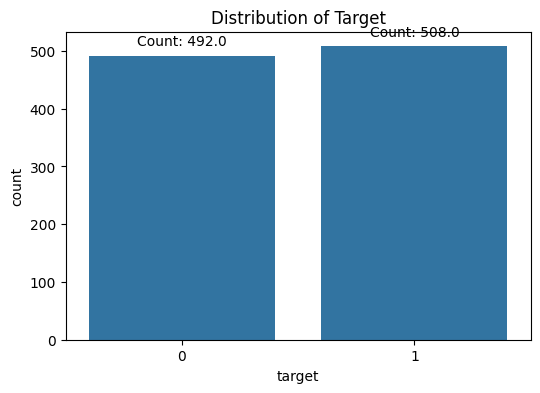

In [45]:
# column: target

# Bar plot for 'target' with count annotations
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', data=df)
plt.title('Distribution of Target')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Exploring Independent Variables

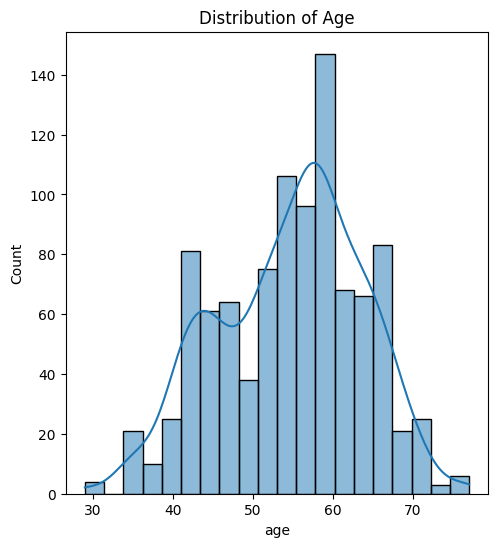

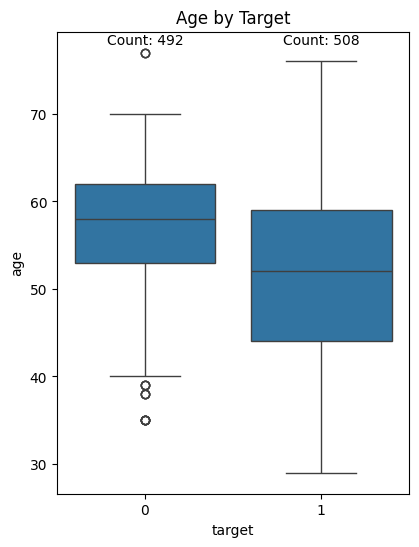

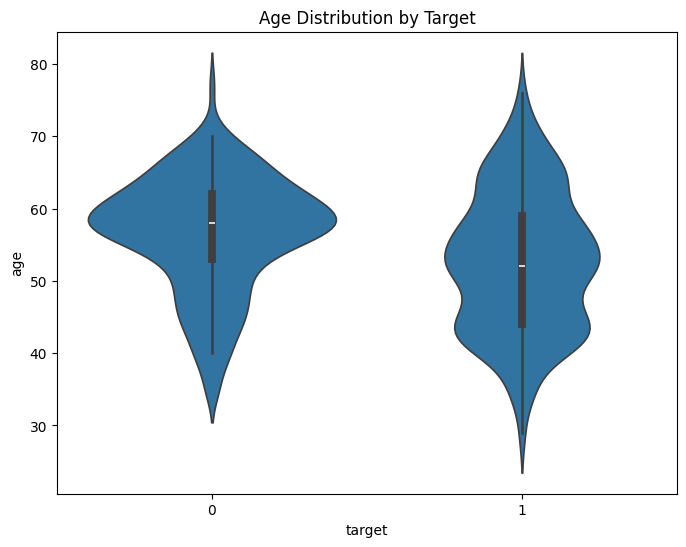

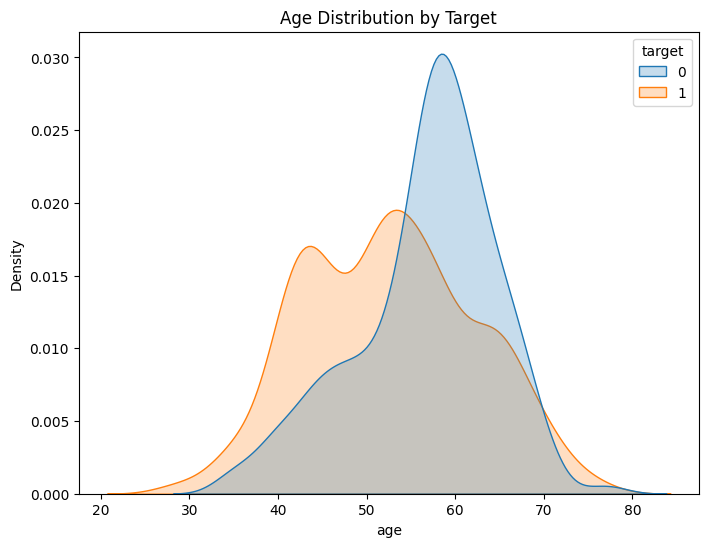

In [46]:
# column: age



# Histogram and boxplot for 'age'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Create a boxplot with count annotations
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='age', data=df)
plt.title('Age by Target')

# Add count annotations to the box plot
counts = df.groupby('target')['age'].count().values
locs = range(len(counts))
for loc, count in zip(locs, counts):
    ax.annotate(f'Count: {count}', (loc, df['age'].max() + 1), ha='center', color='black')

plt.show()

# Violin plot for 'age' by 'target'
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='age', data=df)
plt.title('Age Distribution by Target')
plt.show()

# KDE plot for 'age' by 'target'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='age', hue='target', fill=True)
plt.title('Age Distribution by Target')
plt.show()

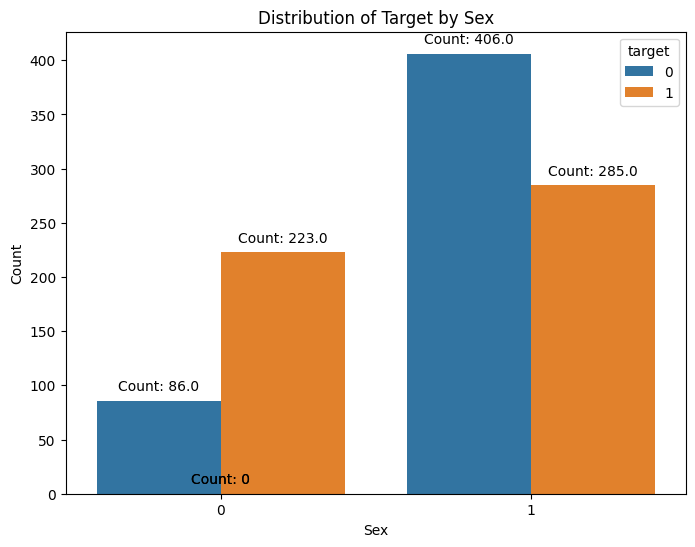

In [47]:
# column: sex


# Create a count plot for 'target' by 'sex' with count annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='target', data=df)
plt.title('Distribution of Target by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

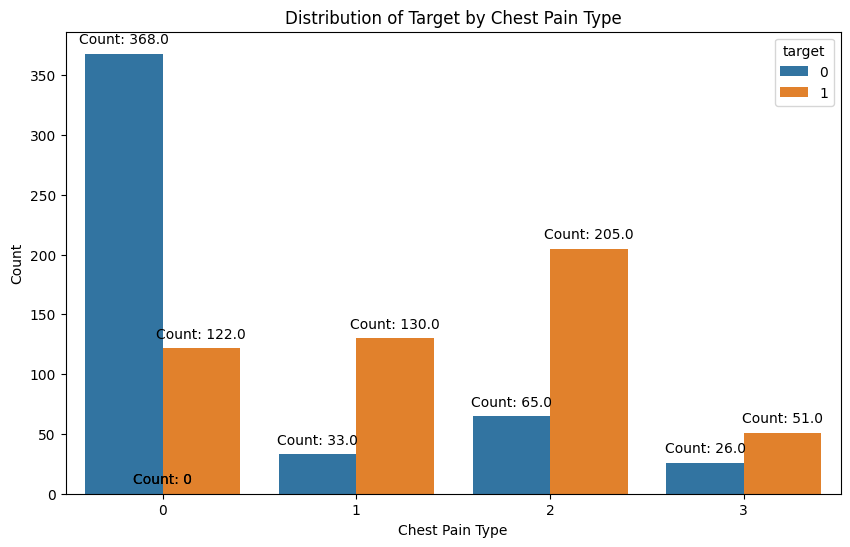

In [48]:
# column: chest_pain_type



# Create a count plot for 'chest_pain_type' by 'target' with count annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='chest_pain_type', hue='target', data=df)
plt.title('Distribution of Target by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

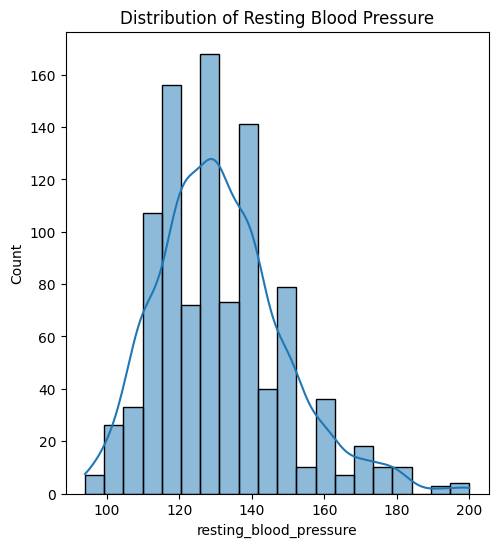

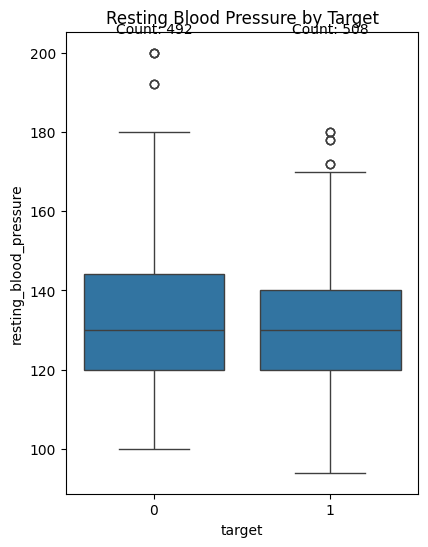

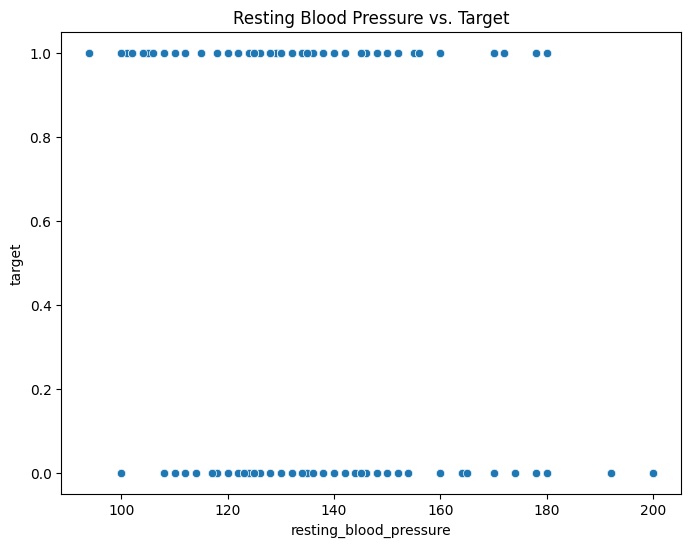

In [49]:
# column: resting_blood_pressure



# Histogram and boxplot for 'resting_blood_pressure'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['resting_blood_pressure'], bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure')

# Create a boxplot with count annotations
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='resting_blood_pressure', data=df)
plt.title('Resting Blood Pressure by Target')

# Add count annotations to the box plot
counts = df.groupby('target')['resting_blood_pressure'].count().values
locs = range(len(counts))
for loc, count in zip(locs, counts):
    ax.annotate(f'Count: {count}', (loc, df['resting_blood_pressure'].max() + 5), ha='center', color='black')

plt.show()

# Scatterplot for 'resting_blood_pressure' vs. 'target'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='resting_blood_pressure', y='target', data=df)
plt.title('Resting Blood Pressure vs. Target')
plt.show()

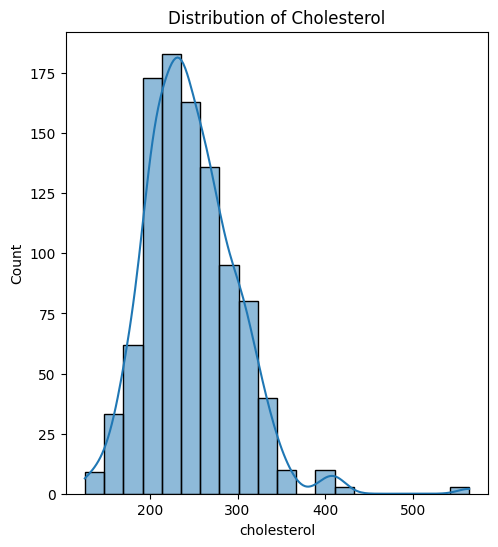

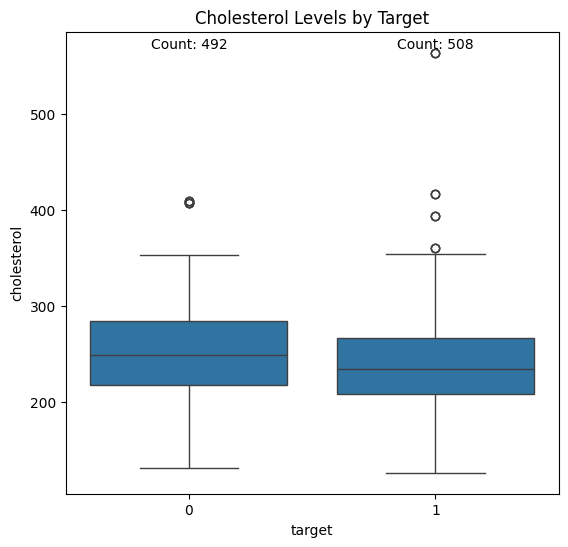

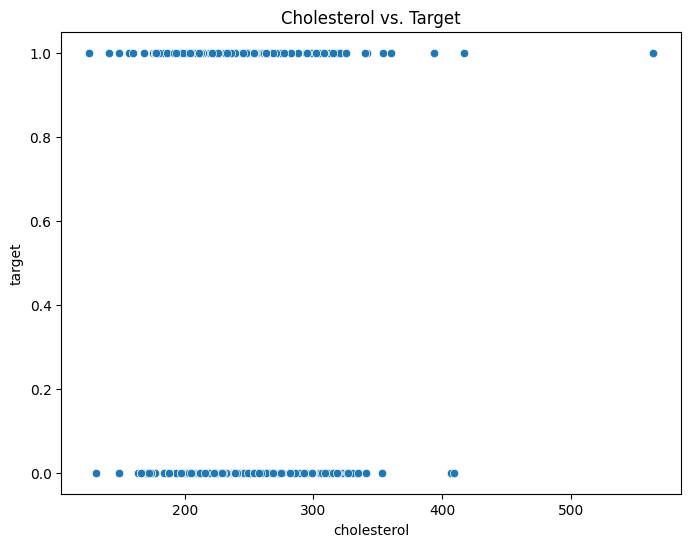

In [50]:
# column: cholesterol



# Histogram and boxplot for 'cholesterol'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['cholesterol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol')

plt.show()

# Create a boxplot with count annotations
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Target')

# Add count annotations to the box plot
counts = df.groupby('target')['cholesterol'].count().values
locs = range(len(counts))
for loc, count in zip(locs, counts):
    ax.annotate(f'Count: {count}', (loc, df['cholesterol'].max() + 5), ha='center', color='black')

plt.show()

# Scatterplot for 'cholesterol' vs. 'target'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cholesterol', y='target', data=df)
plt.title('Cholesterol vs. Target')
plt.show()

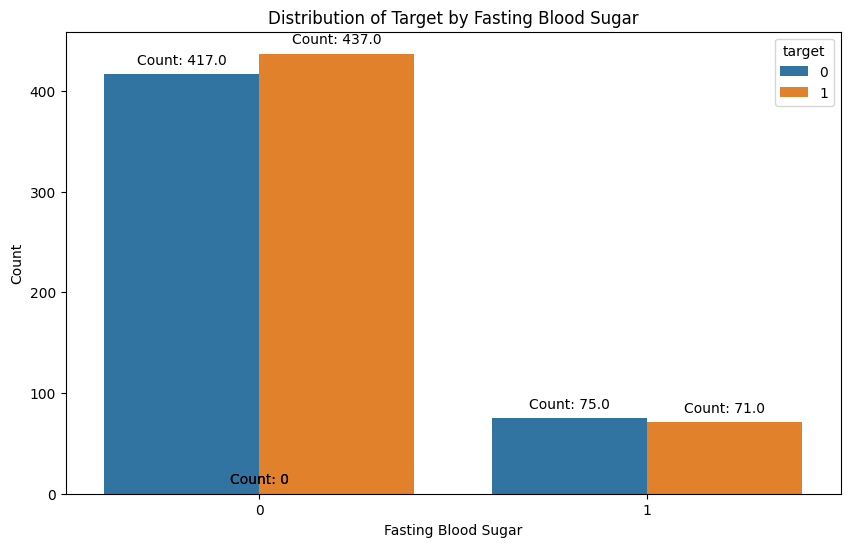

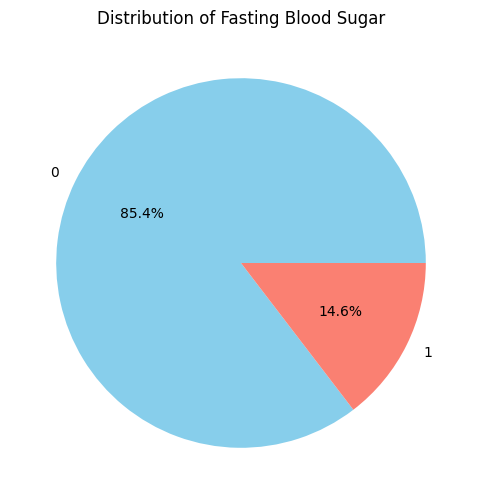

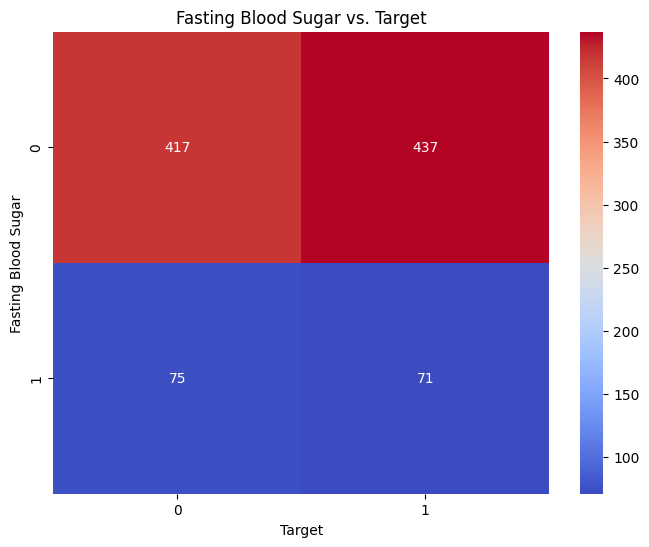

In [51]:
# column: fasting_blood_sugar



# Create a count plot with count annotations on the bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='fasting_blood_sugar', hue='target', data=df)
plt.title('Distribution of Target by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Pie chart for 'fasting_blood_sugar'
plt.figure(figsize=(8, 6))
df['fasting_blood_sugar'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Fasting Blood Sugar')
plt.ylabel('')
plt.show()

# Heatmap for 'fasting_blood_sugar' vs. 'target'
pivot_table = df.pivot_table(index='fasting_blood_sugar', columns='target', aggfunc='size')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Fasting Blood Sugar vs. Target')
plt.xlabel('Target')
plt.ylabel('Fasting Blood Sugar')
plt.show()

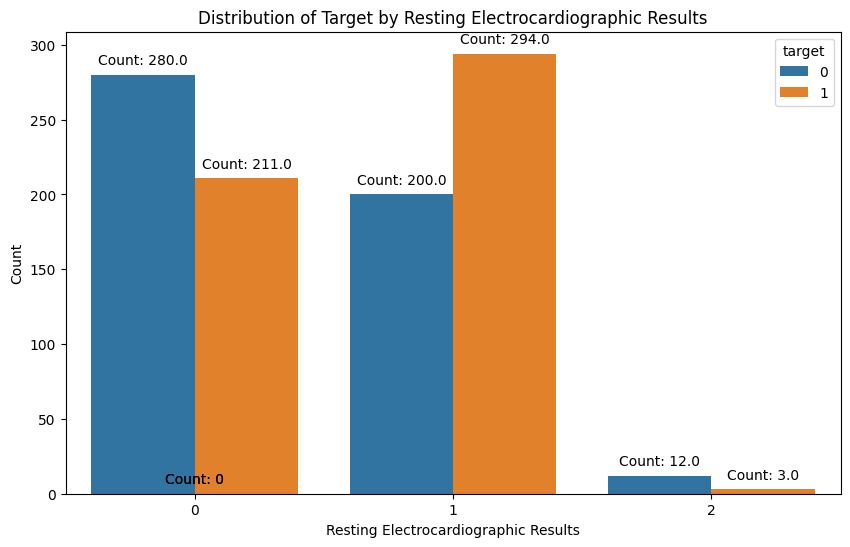

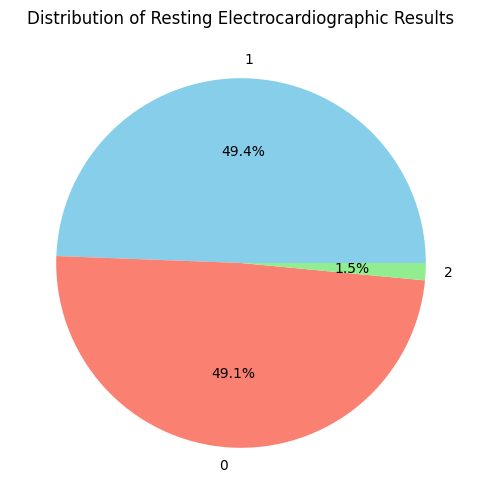

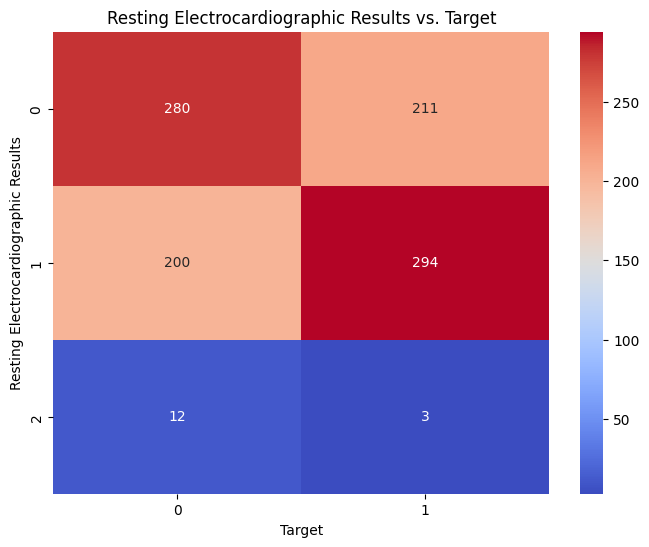

In [52]:
# column: resting_electrocardiographic_results




# Create a count plot with count annotations on the boxes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='resting_electrocardiographic_results', hue='target', data=df)
plt.title('Distribution of Target by Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')

# Add count annotations to the boxes
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Pie chart for 'resting_electrocardiographic_results'
plt.figure(figsize=(8, 6))
df['resting_electrocardiographic_results'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Resting Electrocardiographic Results')
plt.ylabel('')
plt.show()

# Heatmap for 'resting_electrocardiographic_results' vs. 'target'
pivot_table = df.pivot_table(index='resting_electrocardiographic_results', columns='target', aggfunc='size')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Resting Electrocardiographic Results vs. Target')
plt.xlabel('Target')
plt.ylabel('Resting Electrocardiographic Results')
plt.show()

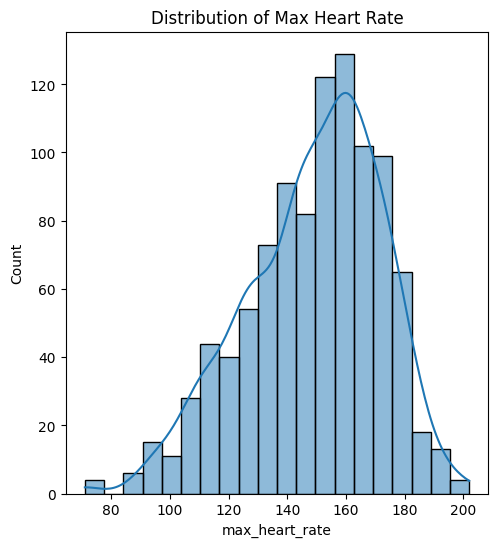

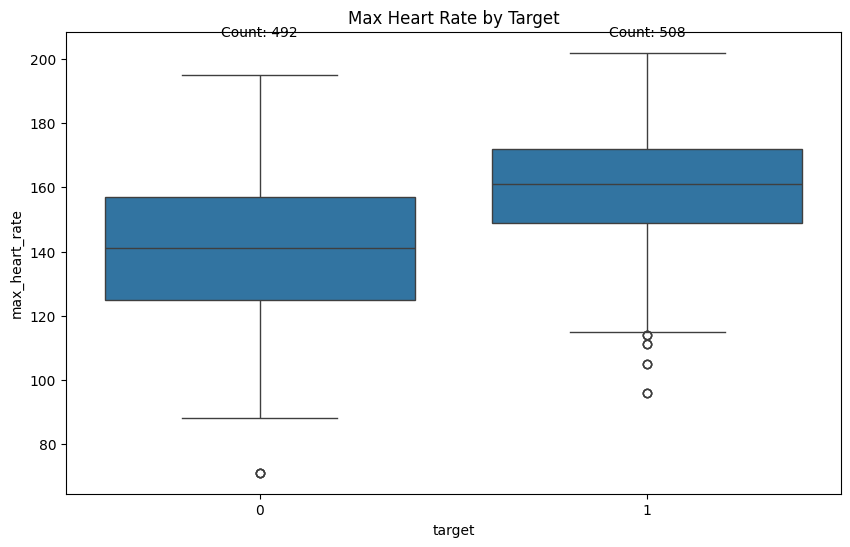

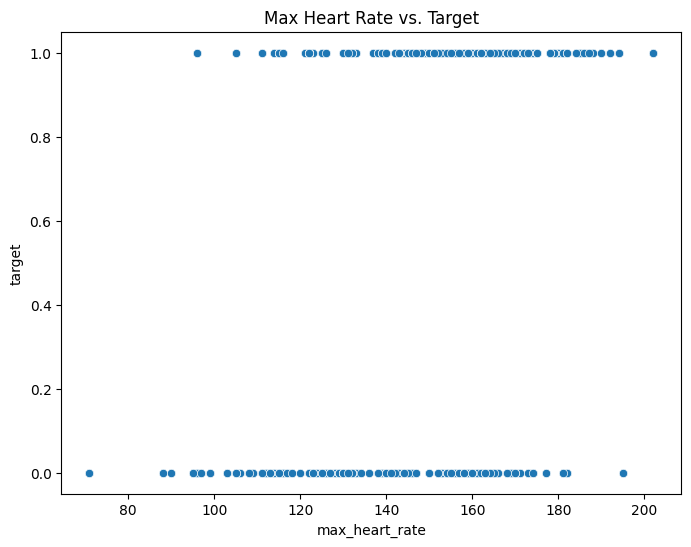

In [53]:
# column: max_heart_rate



# Histogram and boxplot for 'max_heart_rate'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['max_heart_rate'], bins=20, kde=True)
plt.title('Distribution of Max Heart Rate')

# Create a boxplot with count annotations
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='max_heart_rate', data=df)
plt.title('Max Heart Rate by Target')

# Add count annotations to the box plot
counts = df.groupby('target')['max_heart_rate'].count().values
locs = range(len(counts))
for loc, count in zip(locs, counts):
    plt.text(loc, df['max_heart_rate'].max() + 5, f'Count: {count}', ha='center', color='black')

plt.show()

# Scatterplot for 'max_heart_rate' vs. 'target'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='max_heart_rate', y='target', data=df)
plt.title('Max Heart Rate vs. Target')
plt.show()

In [54]:
correlation = df[['cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate']].corrwith(df['target'])
print(correlation)

cholesterol                            -0.089647
fasting_blood_sugar                    -0.017946
resting_electrocardiographic_results    0.127930
max_heart_rate                          0.426872
dtype: float64


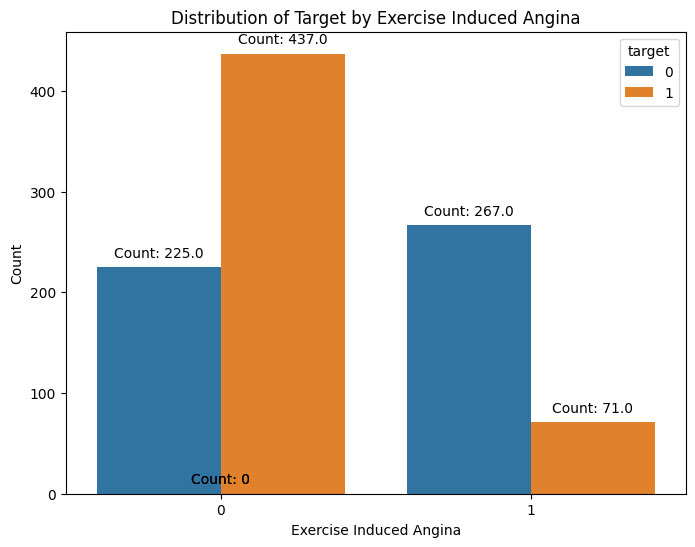

In [55]:
# column: exercise_induced_angina



# Create a count plot for 'target' by 'exercise_induced_angina' with count annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='exercise_induced_angina', hue='target', data=df)
plt.title('Distribution of Target by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

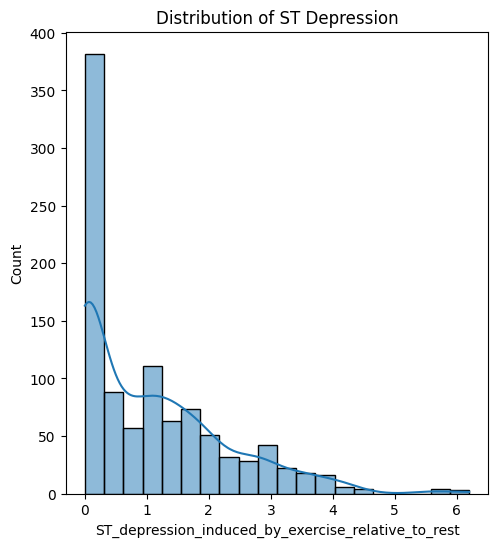

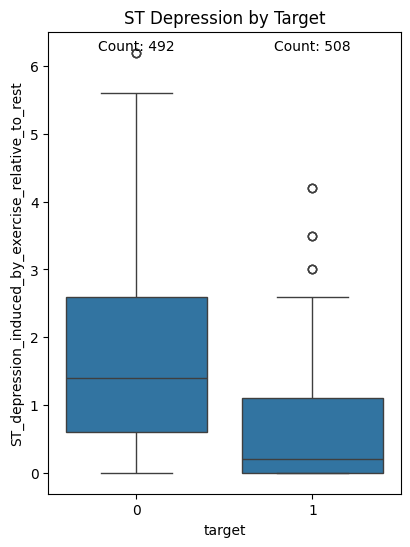

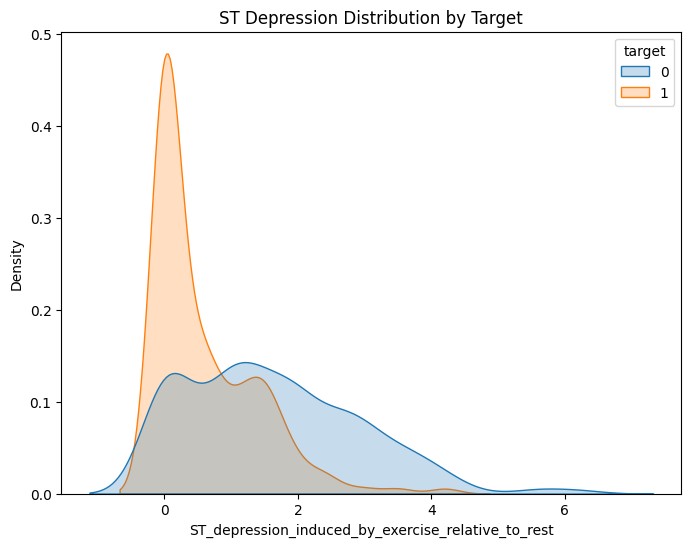

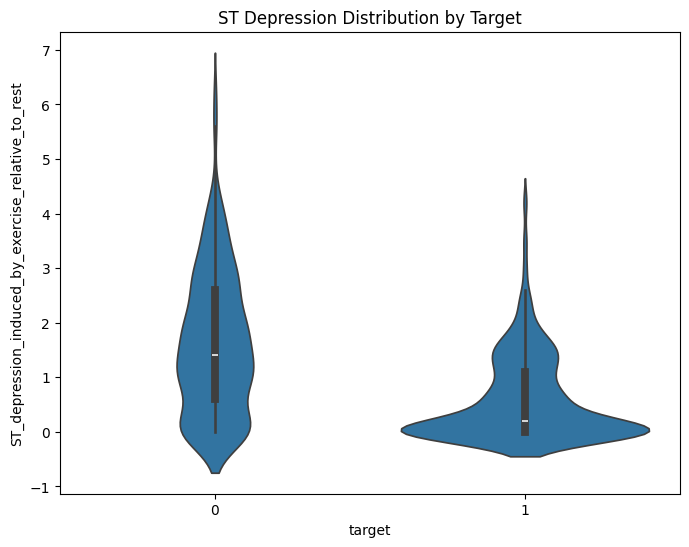

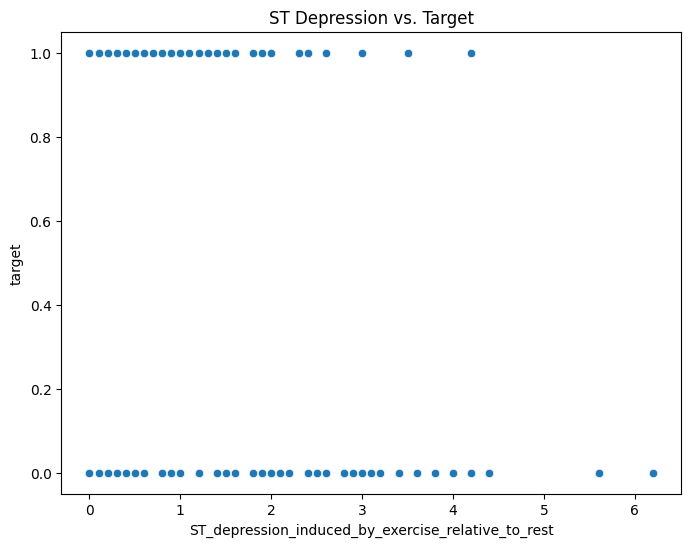

In [56]:
# column: ST_depression_induced_by_exercise_relative_to_rest



# Histogram and boxplot for 'ST_depression_induced_by_exercise_relative_to_rest'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ST_depression_induced_by_exercise_relative_to_rest'], bins=20, kde=True)
plt.title('Distribution of ST Depression')

# Create a boxplot with count annotations
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='ST_depression_induced_by_exercise_relative_to_rest', data=df)
plt.title('ST Depression by Target')

# Add count annotations to the box plot
counts = df.groupby('target')['ST_depression_induced_by_exercise_relative_to_rest'].count().values
locs = range(len(counts))
for loc, count in zip(locs, counts):
    ax.annotate(f'Count: {count}', (loc, df['ST_depression_induced_by_exercise_relative_to_rest'].max() + 0.1),
                ha='center', va='center', color='black')

plt.show()

# KDE plot for 'ST_depression_induced_by_exercise_relative_to_rest' by 'target'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='ST_depression_induced_by_exercise_relative_to_rest', hue='target', fill=True)
plt.title('ST Depression Distribution by Target')
plt.show()

# Violin plot for 'ST_depression_induced_by_exercise_relative_to_rest' by 'target'
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='ST_depression_induced_by_exercise_relative_to_rest', data=df)
plt.title('ST Depression Distribution by Target')
plt.show()

# Scatterplot for 'ST_depression_induced_by_exercise_relative_to_rest' vs. 'target'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ST_depression_induced_by_exercise_relative_to_rest', y='target', data=df)
plt.title('ST Depression vs. Target')
plt.show()

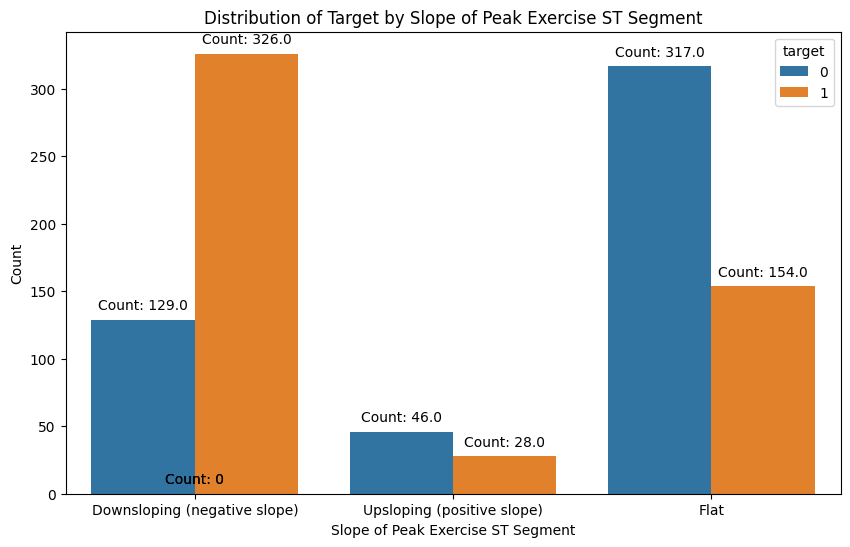

In [57]:
# column: slope



# Replace values temporarily for visualization
df_temp = df.copy()
df_temp['slope'] = df_temp['slope'].replace({0: 'Upsloping (positive slope)',
                                             1: 'Flat',
                                             2: 'Downsloping (negative slope)'})

# Create a count plot for 'target' by 'slope' with count annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='slope', hue='target', data=df_temp)
plt.title('Distribution of Target by Slope of Peak Exercise ST Segment')
plt.xlabel('Slope of Peak Exercise ST Segment')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

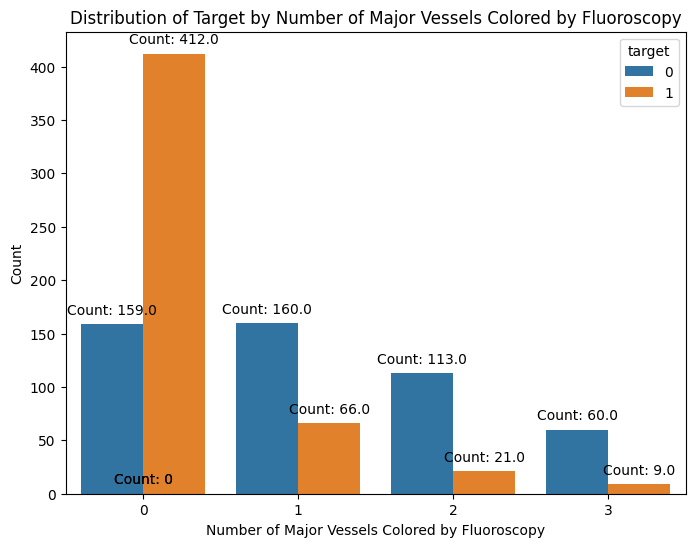

In [58]:
# column: number_of_major_vessels_(0-3)_colored_by_flouroscopy



# Create a count plot for 'target' by 'number_of_major_vessels_(0-3)_colored_by_flourcosopy'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='number_of_major_vessels_(0-3)_colored_by_flouroscopy', hue='target', data=df)
plt.title('Distribution of Target by Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

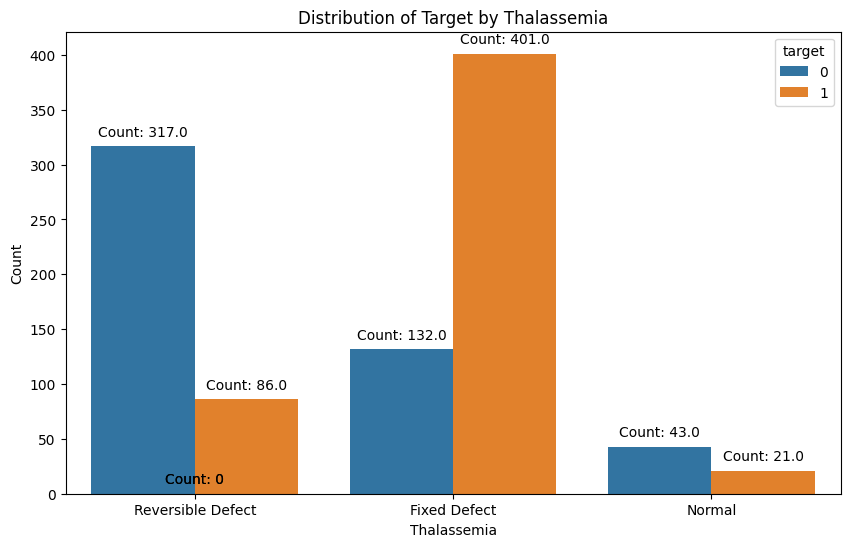

In [59]:
# column: thalassemia



# Replace values temporarily for visualization
df_temp = df.copy()
df_temp['thalassemia'] = df_temp['thalassemia'].replace({1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'})

# Create a count plot for 'target' by 'thalassemia' with count annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='thalassemia', hue='target', data=df_temp)
plt.title('Distribution of Target by Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Calculating Correlation Between Numerical Values and Target

In [60]:
correlation = df[['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate']].corrwith(df['target'])

correlation

age                      -0.226825
cholesterol              -0.089647
resting_blood_pressure   -0.143221
max_heart_rate            0.426872
dtype: float64

#### Calculating Correlation Between Categorical Values and Target
We cannot use Pearson's to calculate categorical values. Instead, we used the chi-test, which calculates whether two variables are independent of each other and not. Summing up, if the p-value is smaller than 0.05, we can confidently say that the two variables (a variable and target, in this case) are not independent (rejecting the null hypothesis).

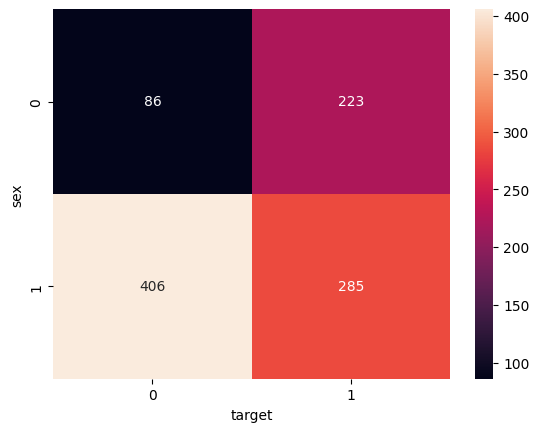

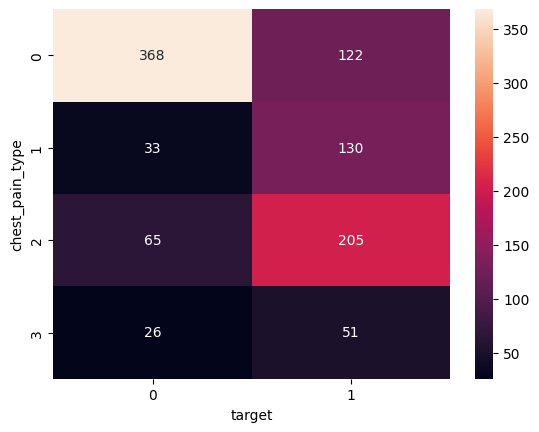

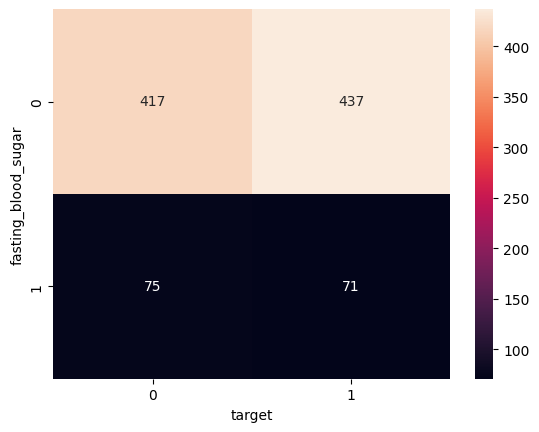

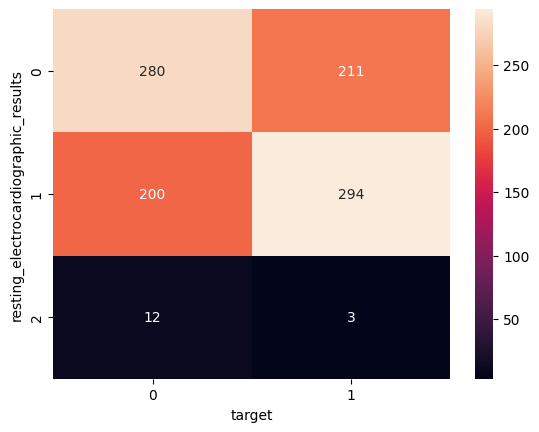

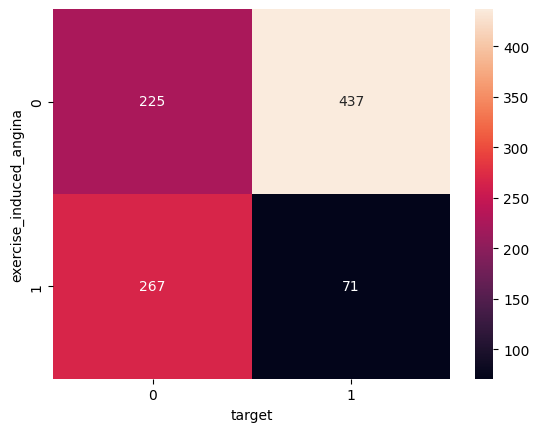

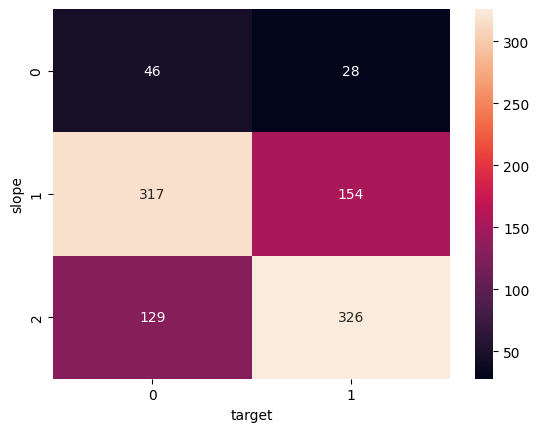

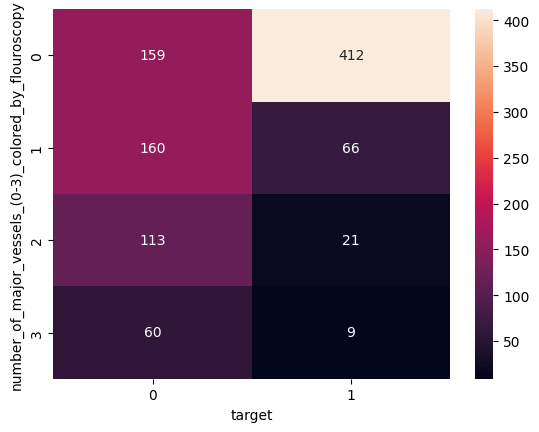

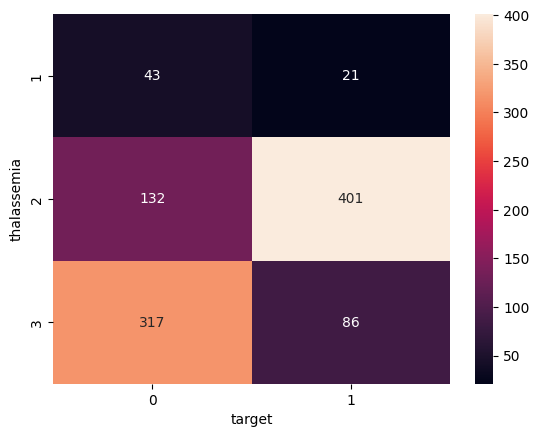

In [61]:
#chi_test = stats.chisquare(df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels_(0-3)_colored_by_flourosopy', 'thalassemia']])

sex_target = pd.crosstab(df['sex'], df['target'])
sns.heatmap(sex_target, annot=True, fmt='g')
plt.show()
c, p_sex_to_target, dof, expected = stats.chi2_contingency(sex_target)

chest_pain_type_target = pd.crosstab(df['chest_pain_type'], df['target'])
sns.heatmap(chest_pain_type_target, annot=True, fmt='g')
plt.show()
c, p_chest_pain_type_to_target, dof, expected = stats.chi2_contingency(chest_pain_type_target)

fasting_blood_sugar_target = pd.crosstab(df['fasting_blood_sugar'], df['target'])
sns.heatmap(fasting_blood_sugar_target, annot=True, fmt='g')
plt.show()
c, p_fasting_blood_sugar_to_target, dof, expected = stats.chi2_contingency(fasting_blood_sugar_target)

resting_electrocardiographic_results_target = pd.crosstab(df['resting_electrocardiographic_results'], df['target'])
sns.heatmap(resting_electrocardiographic_results_target, annot=True, fmt='g')
plt.show()
c, p_resting_electrocardiographic_results_to_target, dof, expected = stats.chi2_contingency(resting_electrocardiographic_results_target)

exercise_induced_angina_target = pd.crosstab(df['exercise_induced_angina'], df['target'])
sns.heatmap(exercise_induced_angina_target, annot=True, fmt='g')
plt.show()
c, p_exercise_induced_angina_to_target, dof, expected = stats.chi2_contingency(exercise_induced_angina_target)

slope_target = pd.crosstab(df['slope'], df['target'])
sns.heatmap(slope_target, annot=True, fmt='g')
plt.show()
c, p_slope_to_target, dof, expected = stats.chi2_contingency(slope_target)

number_of_major_vessels_colored_by_flouroscopy_target = pd.crosstab(df['number_of_major_vessels_(0-3)_colored_by_flouroscopy'], df['target'])
sns.heatmap(number_of_major_vessels_colored_by_flouroscopy_target, annot=True, fmt='g')
plt.show()
c, p_number_of_major_vessels_colored_by_flouroscopy_to_target, dof, expected = stats.chi2_contingency(number_of_major_vessels_colored_by_flouroscopy_target)

thalassemia_target = pd.crosstab(df['thalassemia'], df['target'])
sns.heatmap(thalassemia_target, annot=True, fmt='g')
plt.show()
c, p_thalassemia_to_target, dof, expected = stats.chi2_contingency(thalassemia_target)

In [62]:
print("p-value of sex to target is: ", p_sex_to_target)
print("p-value of chest pain type to target is: ", p_chest_pain_type_to_target)
print("p-value of fasting blood sugar to target is: ", p_fasting_blood_sugar_to_target)
print("p-value of resting electrocardiographic results to target is: ", p_resting_electrocardiographic_results_to_target)
print("p-value of exercise induced angina to target is: ", p_exercise_induced_angina_to_target)
print("p-value of slope to target is: ", p_slope_to_target)
print("p-value of number of major vessels colored by flouroscopy to target is: ", p_number_of_major_vessels_colored_by_flouroscopy_to_target)
print("p-value of thalassemia to target is: ", p_thalassemia_to_target)

p-value of sex to target is:  2.964144281413887e-19
p-value of chest pain type to target is:  1.8836960565759908e-56
p-value of fasting blood sugar to target is:  0.6326986478745318
p-value of resting electrocardiographic results to target is:  7.790475637091325e-08
p-value of exercise induced angina to target is:  6.100579029517068e-41
p-value of slope to target is:  2.1185401039948578e-32
p-value of number of major vessels colored by flouroscopy to target is:  2.5843106707824698e-54
p-value of thalassemia to target is:  1.463758921679467e-60


As you can see from the values above, only fasting blood sugar seems to be a bad indicator of heart disease based on the dataset.

#Machine Learning

The general pipeline for these models are:
1. Creating x & y (x are all the independent variables, y is the dependent variable; target)
2. Splitting train and test data (stratifying by y)
3. Fitting the model to the train data
4. Predict y by using test data
5. Compare predicted and actual y value
6. Use metrics such as accuracy, precision, recall, and f1 to quantify how the model performs

#### Decision Tree

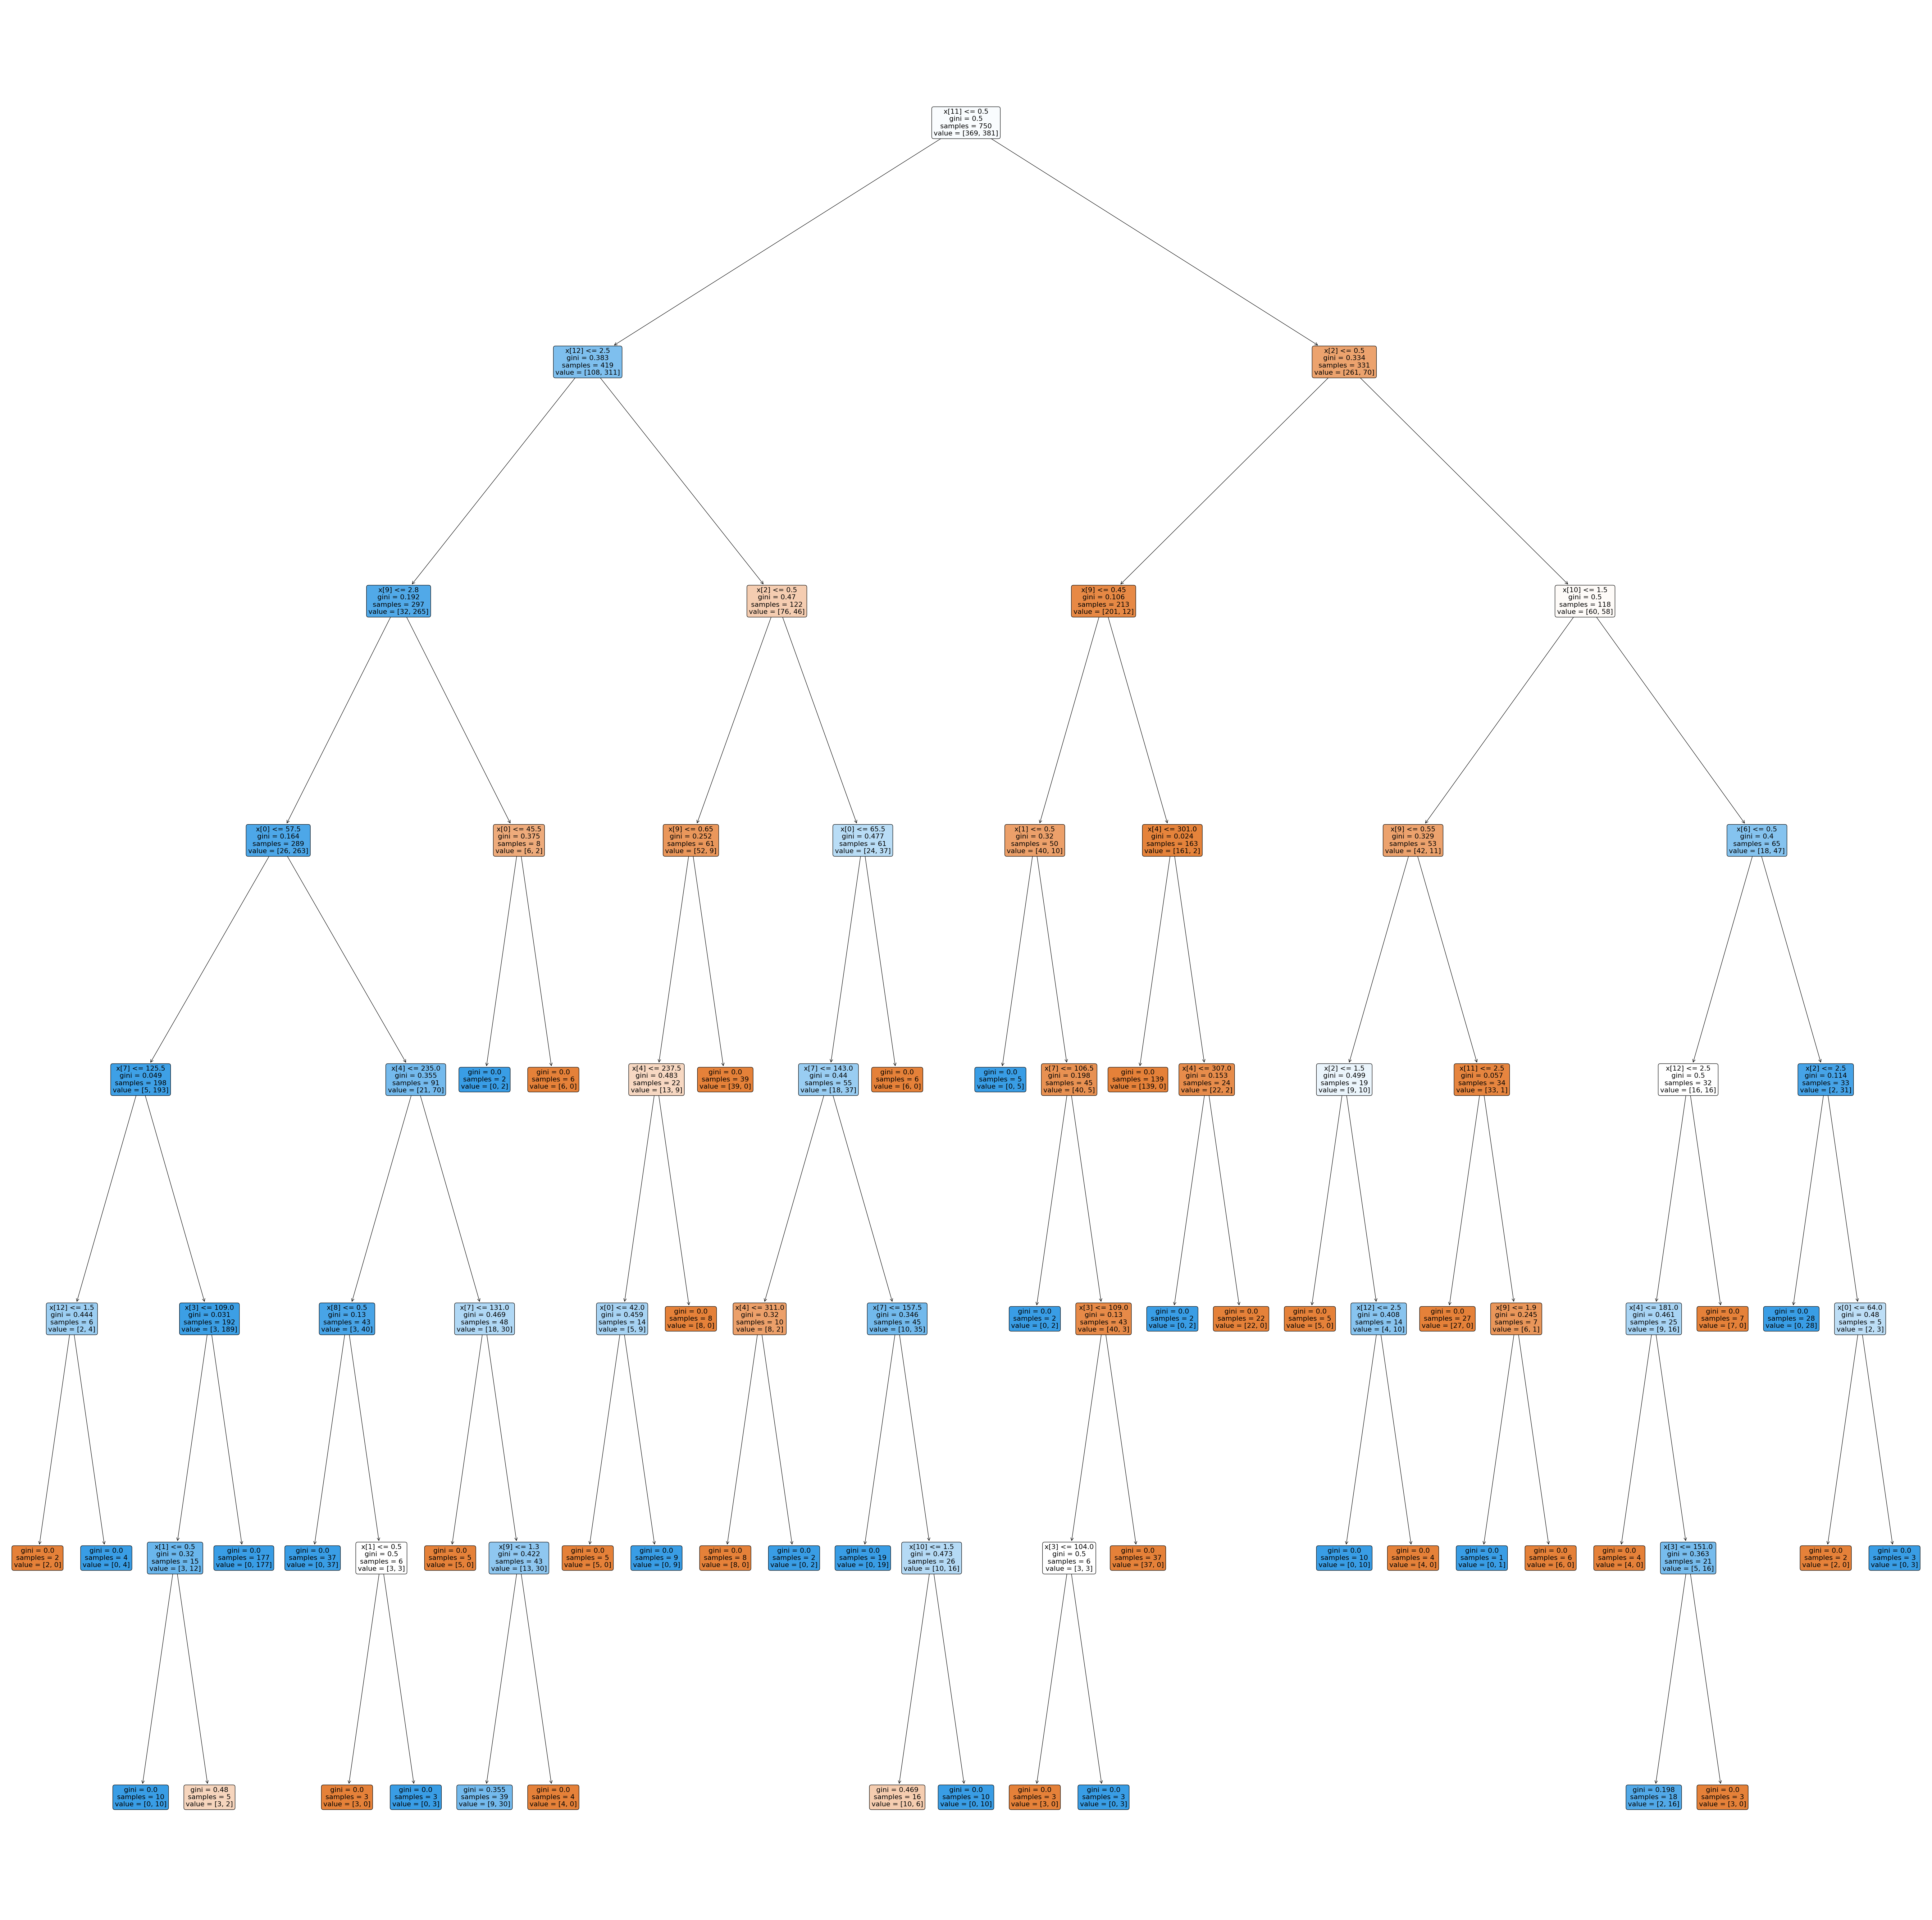

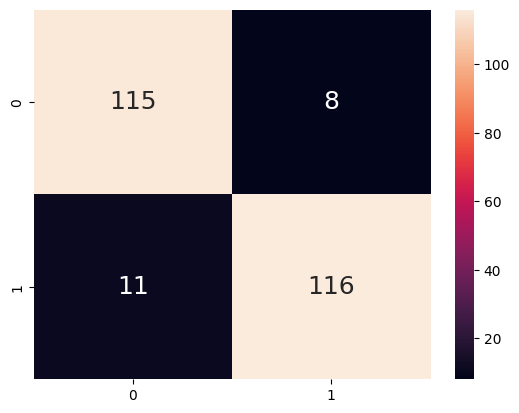

In [63]:
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=52)

# Initialize the model
DTmodel = skl.tree.DecisionTreeClassifier(max_depth = 7)

DTmodel.fit(x_train, y_train)

y_pred = DTmodel.predict(x_test)

plt.figure(figsize=(80,80))

skl.tree.plot_tree(DTmodel, filled=True, rounded=True)

plt.show()

conf_matr = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matr, annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [64]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 0.924
Precision: 0.9354838709677419
Recall: 0.9133858267716536
F1 Score: 0.9243027888446215


####Random Forest Regression

Accuracy: 0.96


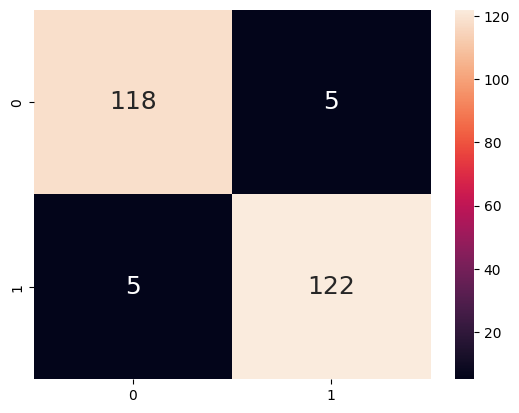

In [65]:
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y, random_state=52)

# Initialize the model
RFmodel = RandomForestClassifier(max_depth = 7)

RFmodel.fit(x_train, y_train)

y_pred = RFmodel.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

print(f'Accuracy: {accuracy}')

In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 0.96
Precision: 0.9606299212598425
Recall: 0.9606299212598425
F1 Score: 0.9606299212598425


####Logistic regression

In [67]:
# Split data into features and target
X = df.drop(columns='target')
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=52)


In [68]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


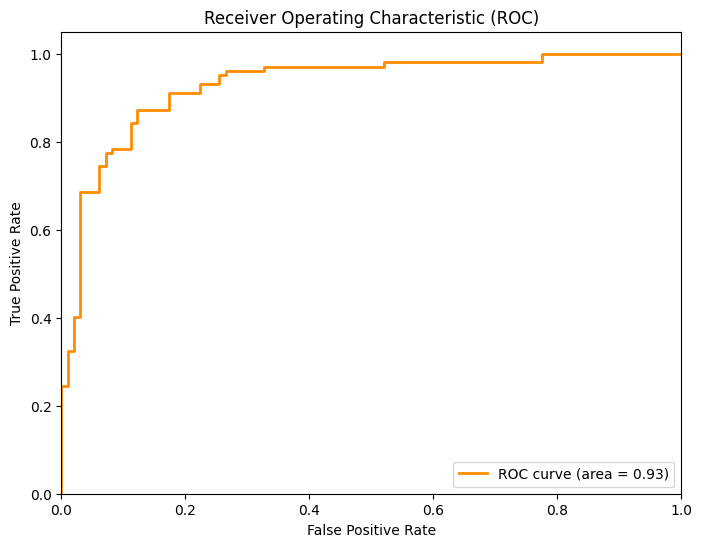

<Axes: >

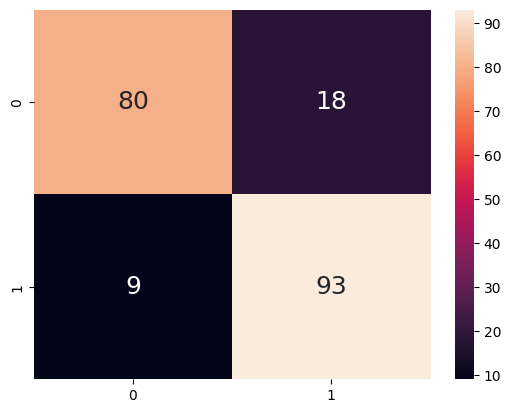

In [69]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 0.865
Precision: 0.8378378378378378
Recall: 0.9117647058823529
F1 Score: 0.8732394366197184


#### Neural Network

**1 Hidden Layer**

8/8 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.9520
Test Accuracy: 0.95


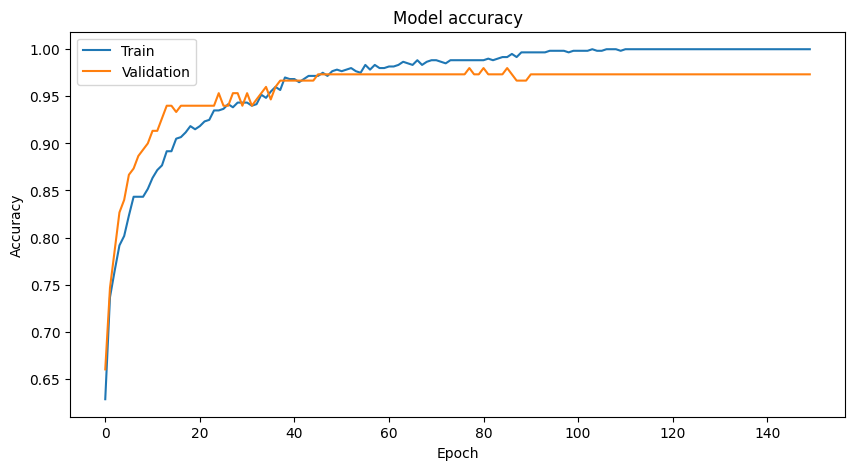

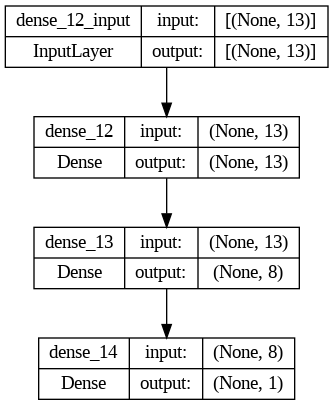

In [71]:
x = df.drop(columns='target')
y = df['target']

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, stratify=y, random_state=52)

# Define the model
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),  # Input layer requires input_dim parameter
    Dense(8, activation='relu'),  # Adding the first hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**2 Hidden Layers**

8/8 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.9560
Test Accuracy: 0.96


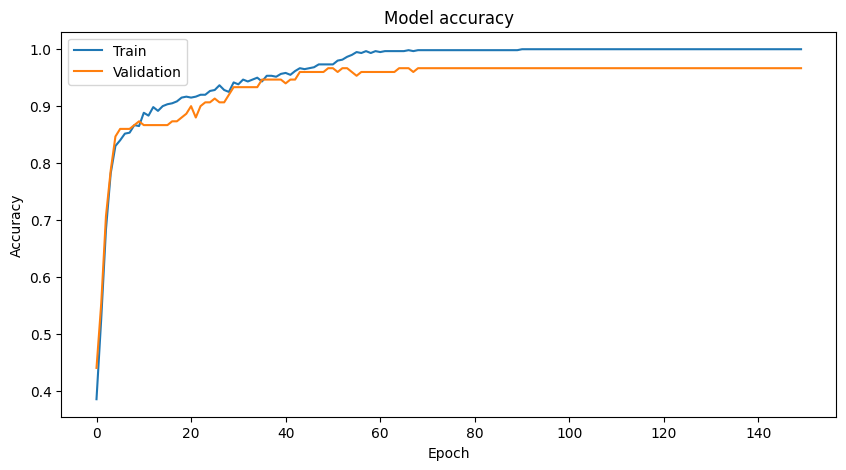

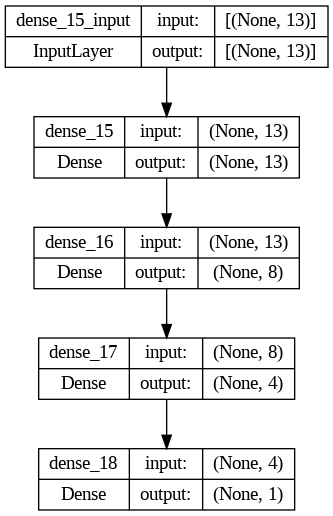

In [72]:

# Define the model
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),  # Input layer requires input_dim parameter
    Dense(8, activation='relu'),  # Adding the first hidden layer
    Dense(4, activation='relu'),  # Adding the second hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**3 Hidden Layers**

8/8 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.9280
Test Accuracy: 0.93


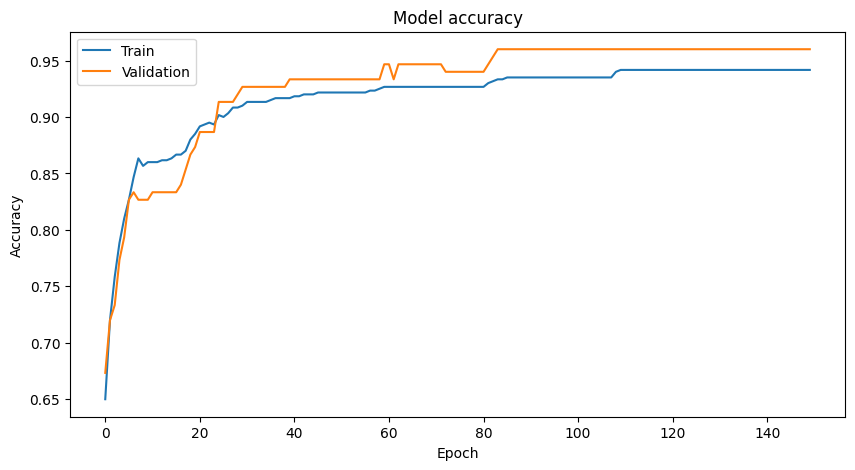

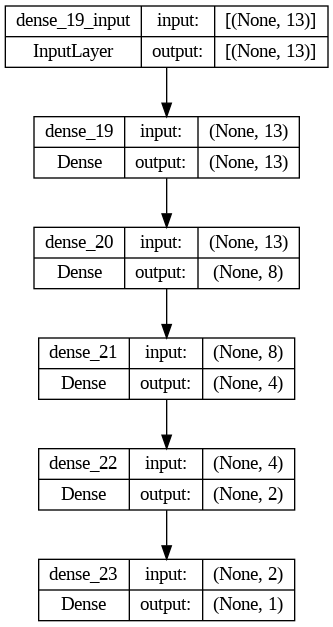

In [73]:
# Define the model
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),  # Input layer requires input_dim parameter
    Dense(8, activation='relu'),  # Adding the first hidden layer
    Dense(4, activation='relu'),  # Adding the second hidden layer
    Dense(2, activation='relu'),  # Adding the third hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Conclusion

From the accuracy scores, it is clear to see that the Neural Network model with 2 hidden layers provided us with the best prediction with an **accuracy score of 0.9720**.

Some of the most important factors when it comes to predicting heart disease are **thalassemia, chest pain type, and number of major vessels coloured by fluoroscopy**. This conclusion is based on the top 3 decision nodes as well as the correlation values.

Some considerations that we could take into account next time would be to:
1. Tweak the activation functions for each hidden layer in the neural network
2. Experiment on which variables to include to hopefully optimize the model
3. Change and experiment on model optimizers for the neural network model